# I - Build an Earth description
This class instance is built from 3 model files:
- elasticity model
- short term anelasticity model
- long term anelasticity model
and contains all preprocessed data necessary for Love number computations.

The user can modify these files or chose other files using the same formalism, whose names are given in class constructor parameters:

In [1]:
from src import AnelasticityDescription

Earth_description = AnelasticityDescription(
    elasticity_name="PREM", short_term_anelasticity_name="uniform", long_term_anelasticity_name="uniform"
)

# II - Elastic Love numbers
The frequency independent Love numbers computation only uses the elasticity model of the previously defined instance.

The following function integrates the Earth model from the center of mass to the surface to give Love numbers for a given list of degrees.

This list of degrees is either given as a parameter or built from 2 parameter files. See the default value.

The following result is an array whose:
- axis in position 0 corresponds to degrees
- axis in position 1 corresponds to frequencies (only infinite for the elastic case)
- axis in position 2 corresponds to Love number type: h', l', k', h*, l*, k*, h, l, k

In [2]:
from src import elastic_Love_numbers_computing, load_base_model, parameters_path, generate_degrees_list

degrees = generate_degrees_list(
    degree_thresholds=load_base_model(name="degree_thresholds", path=parameters_path),
    degree_steps=load_base_model(name="degree_steps", path=parameters_path),
)
elastic_Love_numbers = elastic_Love_numbers_computing(anelasticity_description=Earth_description, degrees=degrees)

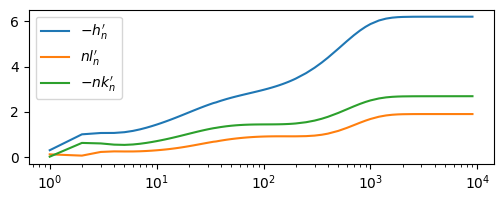

In [14]:
from matplotlib.pyplot import semilogx, figure, legend, grid
from numpy import array

figure(figsize=(6, 2))
semilogx(degrees, -elastic_Love_numbers[:, 0, 0].real, label="$-h_n'$")
semilogx(degrees, array(degrees) * elastic_Love_numbers[:, 0, 1].real, label="$nl_n'$")
semilogx(degrees, -array(degrees) * elastic_Love_numbers[:, 0, 2].real, label="$-nk_n'$")
grid()
legend()

# III - Anlastic Love numbers

In [ ]:
from src import anelastic_Love_numbers_computing

# IV - Loop on Earth Descriptions options

In [ ]:
from src import (
    Love_numbers_single_run,
    Love_numbers_for_options_for_models_for_parameters,
    Result,
)

In [ ]:
from src import Love_numbers_for_options_for_models_for_asymptotic_mu_ratios

anelasticity_description_ids = Love_numbers_for_options_for_models_for_asymptotic_mu_ratios(
    asymptotic_mu_ratios=[0.2],
    elasticity_model_names=["PREM"],
    long_term_anelasticity_model_names=[
        "Burgers_asthenosphere__elastic_lithosphere",
        "Peltier_upper_mantle__elastic_lithosphere",
    ],
    short_term_anelasticity_model_names=["Benjamin_Q_PREM"],
)
anelasticity_description_ids = Love_numbers_for_options_for_models_for_asymptotic_mu_ratios(
    asymptotic_mu_ratios=[0.2],
    elasticity_model_names=["PREM"],
    long_term_anelasticity_model_names=["uniform"],
    short_term_anelasticity_model_names=["uniform"],
)